In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pickle

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('dataset/listings.csv')

# Number of rows and columns

df.shape

(8574, 18)

In [27]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,33491101,Casita refugio interior,252327165,Luz,NaN,El Bosque,-33.56362,-70.70975,Private room,30000,1,0,NaN,NaN,2,140,0,NaN
1,41380910,Casa Condominio Piscina Chamisero/8min de Vita...,110039387,Stephanie,NaN,Huechuraba,-33.32342,-70.63119,Entire home/apt,70000,30,4,2021-03-14,0.13,1,52,0,NaN
2,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,49590,3,0,NaN,NaN,1,178,0,NaN
3,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,50526,1,46,2021-11-04,0.32,3,0,1,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.50,1,356,0,NaN


In [28]:
# Fill missing values

df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [29]:
# Remove null values

df.dropna(how='all',axis=0, inplace=True)

# Print the number of rows and columns after removing null values

df.shape

(8574, 18)

In [30]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,33491101,Casita refugio interior,252327165,Luz,NaN,El Bosque,-33.56362,-70.70975,Private room,30000,1,0,NaN,1.190058,2,140,0,NaN
1,41380910,Casa Condominio Piscina Chamisero/8min de Vita...,110039387,Stephanie,NaN,Huechuraba,-33.32342,-70.63119,Entire home/apt,70000,30,4,2021-03-14,0.130000,1,52,0,NaN
2,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,49590,3,0,NaN,1.190058,1,178,0,NaN
3,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,50526,1,46,2021-11-04,0.320000,3,0,1,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.500000,1,356,0,NaN


In [31]:
# Convert categorical data to numerical data

for i in range(0,len(df)):
    if df['room_type'][i]=='Private room':
        df['room_type'][i]=1
    elif df['room_type'][i]=='Entire home/apt':
        df['room_type'][i]=2
    else:
        df['room_type'][i]=3


df.head()    

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,33491101,Casita refugio interior,252327165,Luz,NaN,El Bosque,-33.56362,-70.70975,1,30000,1,0,NaN,1.190058,2,140,0,NaN
1,41380910,Casa Condominio Piscina Chamisero/8min de Vita...,110039387,Stephanie,NaN,Huechuraba,-33.32342,-70.63119,2,70000,30,4,2021-03-14,0.130000,1,52,0,NaN
2,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,1,49590,3,0,NaN,1.190058,1,178,0,NaN
3,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,2,50526,1,46,2021-11-04,0.320000,3,0,1,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,2,149999,2,38,2021-05-22,0.500000,1,356,0,NaN


<AxesSubplot: xlabel='count', ylabel='neighbourhood'>

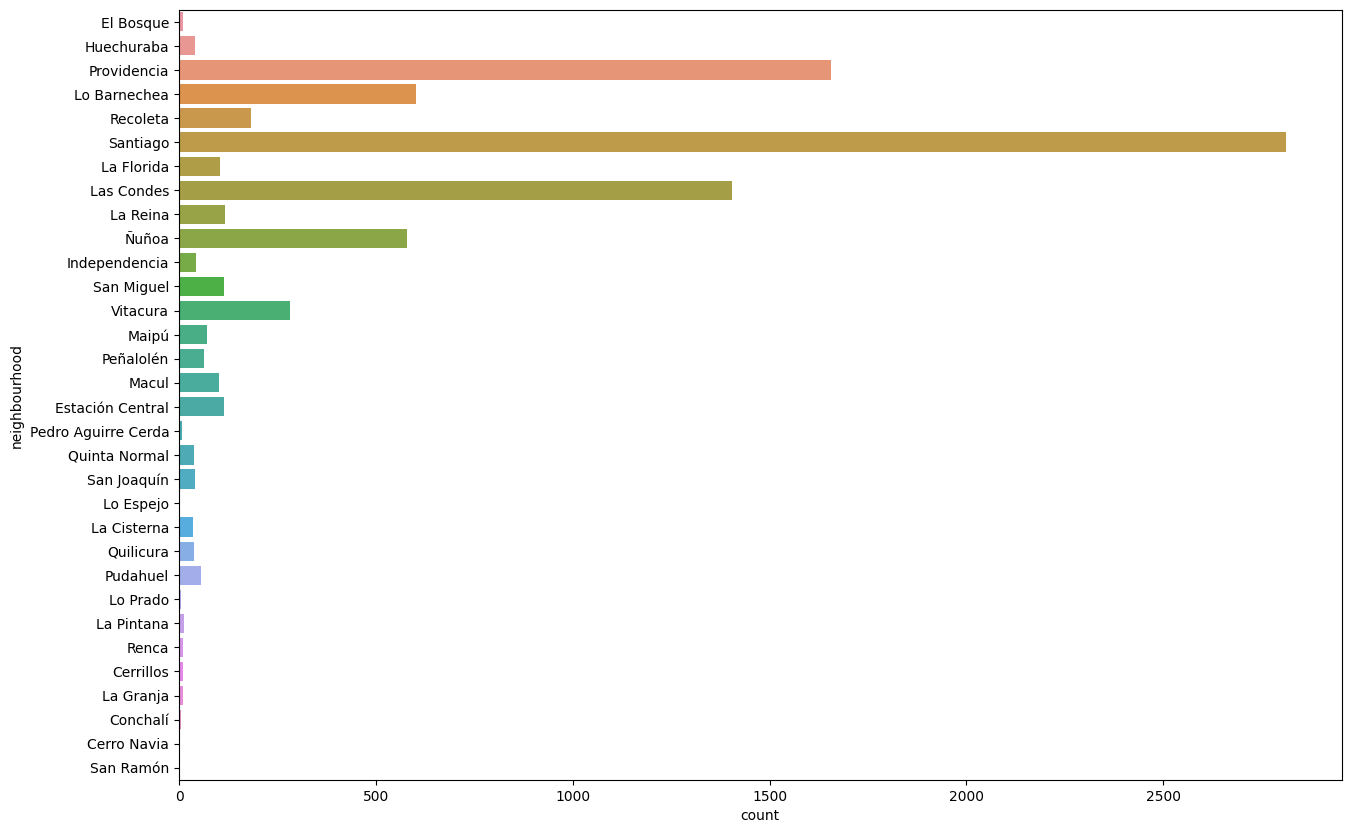

In [32]:
# Plot number of listings per neighbourhood

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,10))

sns.countplot(y='neighbourhood', data=df)


<AxesSubplot: xlabel='count', ylabel='room_type'>

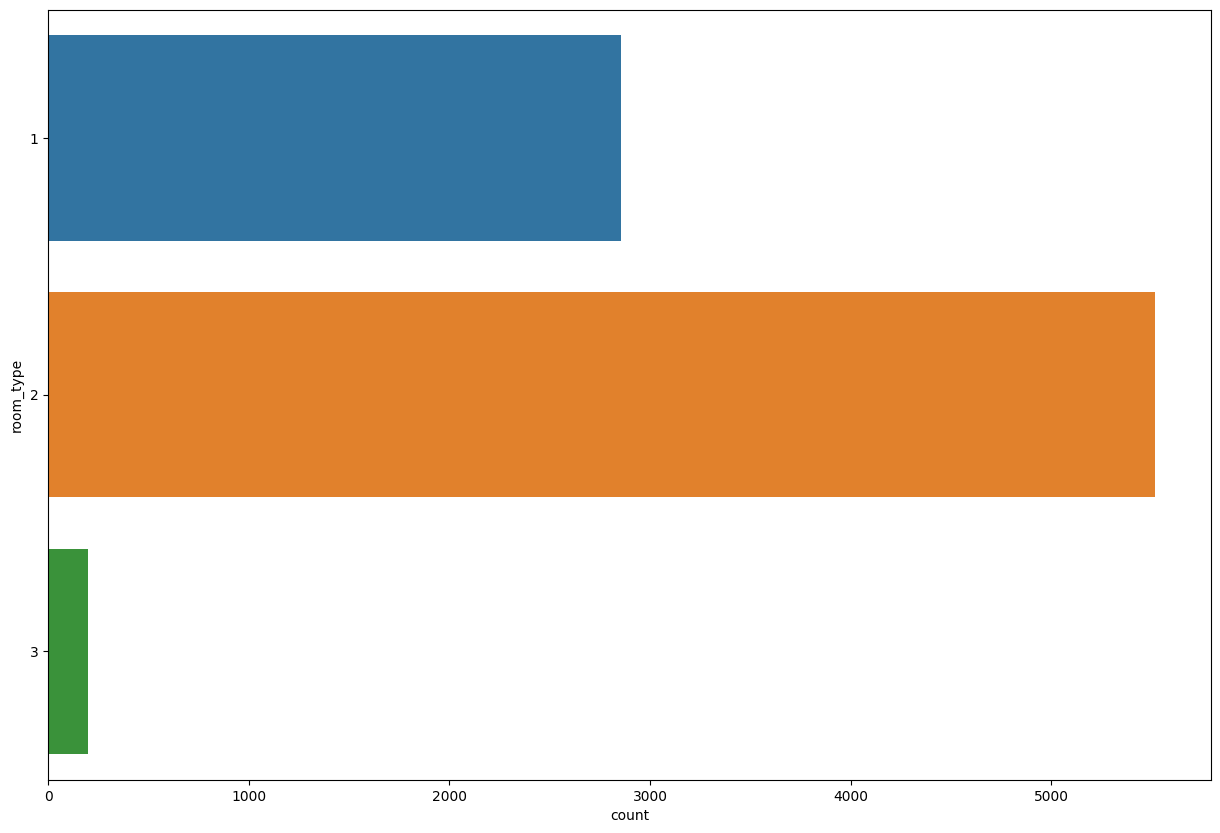

In [33]:
# Plot number of private rooms, entire homes and shared rooms

plt.figure(figsize=(15,10))

sns.countplot(y='room_type', data=df)


<AxesSubplot: xlabel='price', ylabel='neighbourhood'>

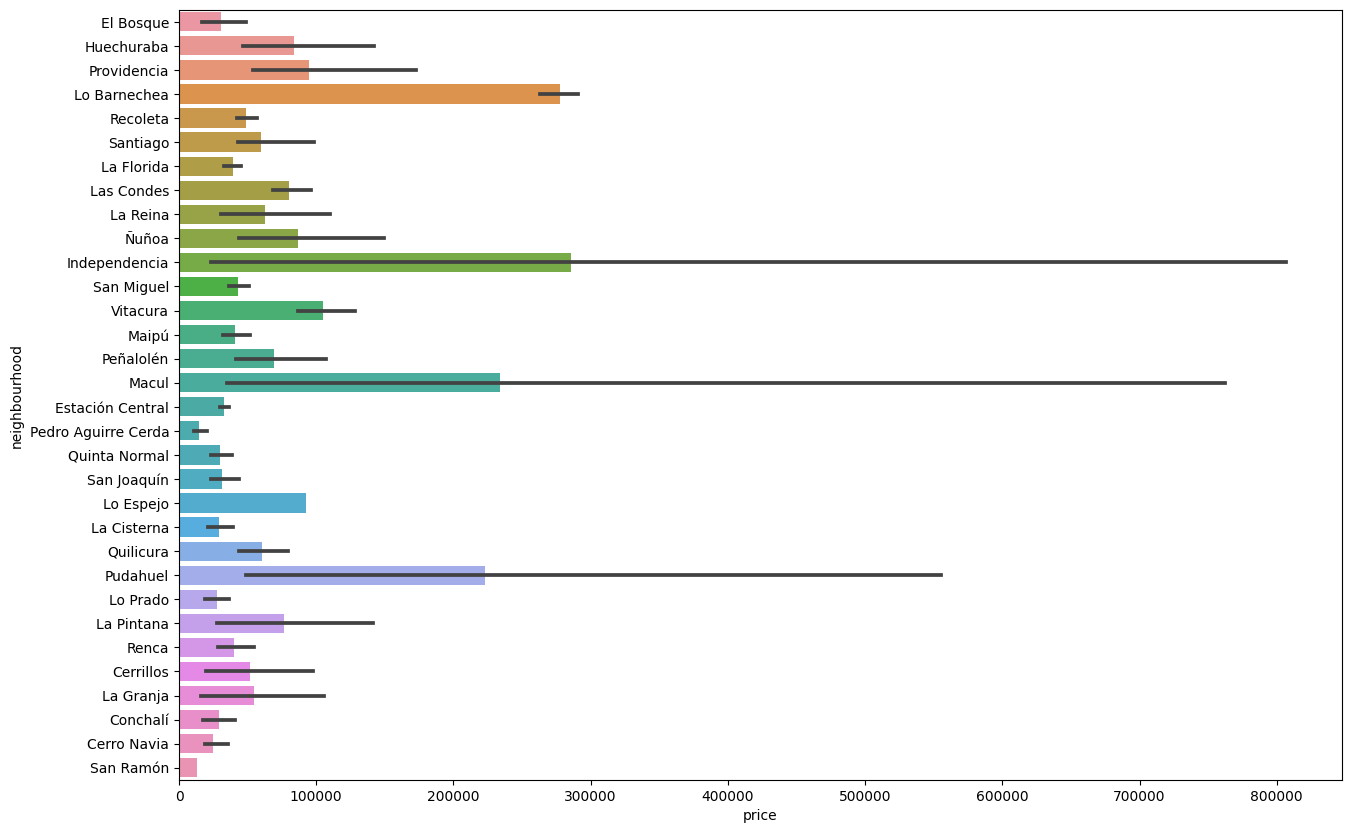

In [34]:
# Plot average price per neighbourhood

plt.figure(figsize=(15,10))

sns.barplot(x='price', y='neighbourhood', data=df)


<AxesSubplot: xlabel='room_type', ylabel='price'>

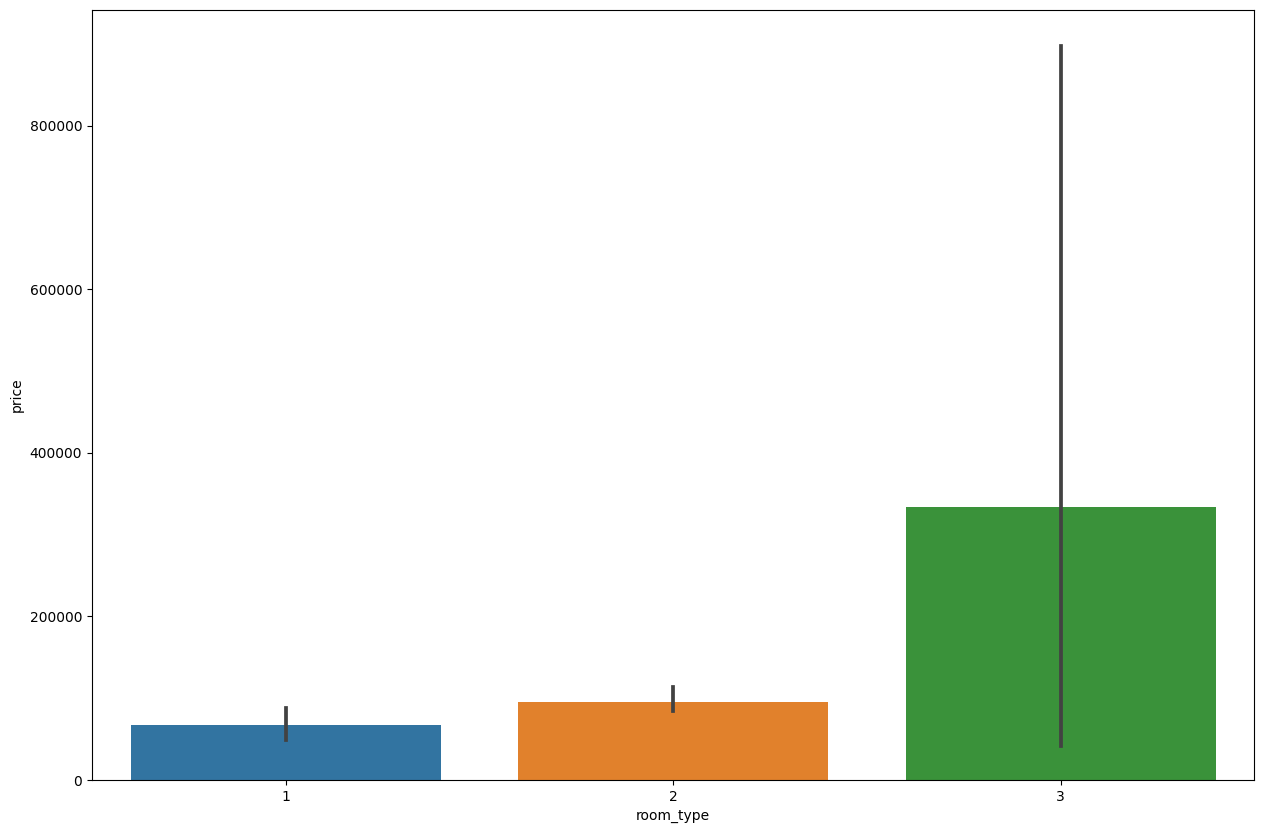

In [35]:
# Plot average price per room type

plt.figure(figsize=(15,10))

sns.barplot(x='room_type', y='price', data=df)


In [36]:

n_dict = {}

for i, name in enumerate(set(df['neighbourhood'])):
    n_dict[name] = i

# Sort the dictionary by key

n_dict = dict(sorted(n_dict.items(), key=lambda item: item[1]))

print(n_dict)

{'Quinta Normal': 0, 'San Joaquín': 1, 'La Pintana': 2, 'Estación Central': 3, 'Renca': 4, 'Huechuraba': 5, 'Conchalí': 6, 'Lo Prado': 7, 'Pedro Aguirre Cerda': 8, 'La Granja': 9, 'Recoleta': 10, 'Lo Espejo': 11, 'Providencia': 12, 'Ñuñoa': 13, 'Cerrillos': 14, 'La Reina': 15, 'Vitacura': 16, 'Santiago': 17, 'Pudahuel': 18, 'Cerro Navia': 19, 'Peñalolén': 20, 'San Ramón': 21, 'Quilicura': 22, 'La Cisterna': 23, 'Las Condes': 24, 'La Florida': 25, 'Lo Barnechea': 26, 'San Miguel': 27, 'Macul': 28, 'Independencia': 29, 'El Bosque': 30, 'Maipú': 31}


In [37]:
# Convert neighbourhood to numerical data

for i in range(0,len(df)):
    df['neighbourhood'][i]=n_dict[df['neighbourhood'][i]]

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,33491101,Casita refugio interior,252327165,Luz,NaN,30,-33.56362,-70.70975,1,30000,1,0,NaN,1.190058,2,140,0,NaN
1,41380910,Casa Condominio Piscina Chamisero/8min de Vita...,110039387,Stephanie,NaN,5,-33.32342,-70.63119,2,70000,30,4,2021-03-14,0.130000,1,52,0,NaN
2,49392,Share my Flat in Providencia,224592,Maria,NaN,12,-33.43266,-70.60072,1,49590,3,0,NaN,1.190058,1,178,0,NaN
3,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,12,-33.42959,-70.61880,2,50526,1,46,2021-11-04,0.320000,3,0,1,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,26,-33.34344,-70.29432,2,149999,2,38,2021-05-22,0.500000,1,356,0,NaN


<AxesSubplot: >

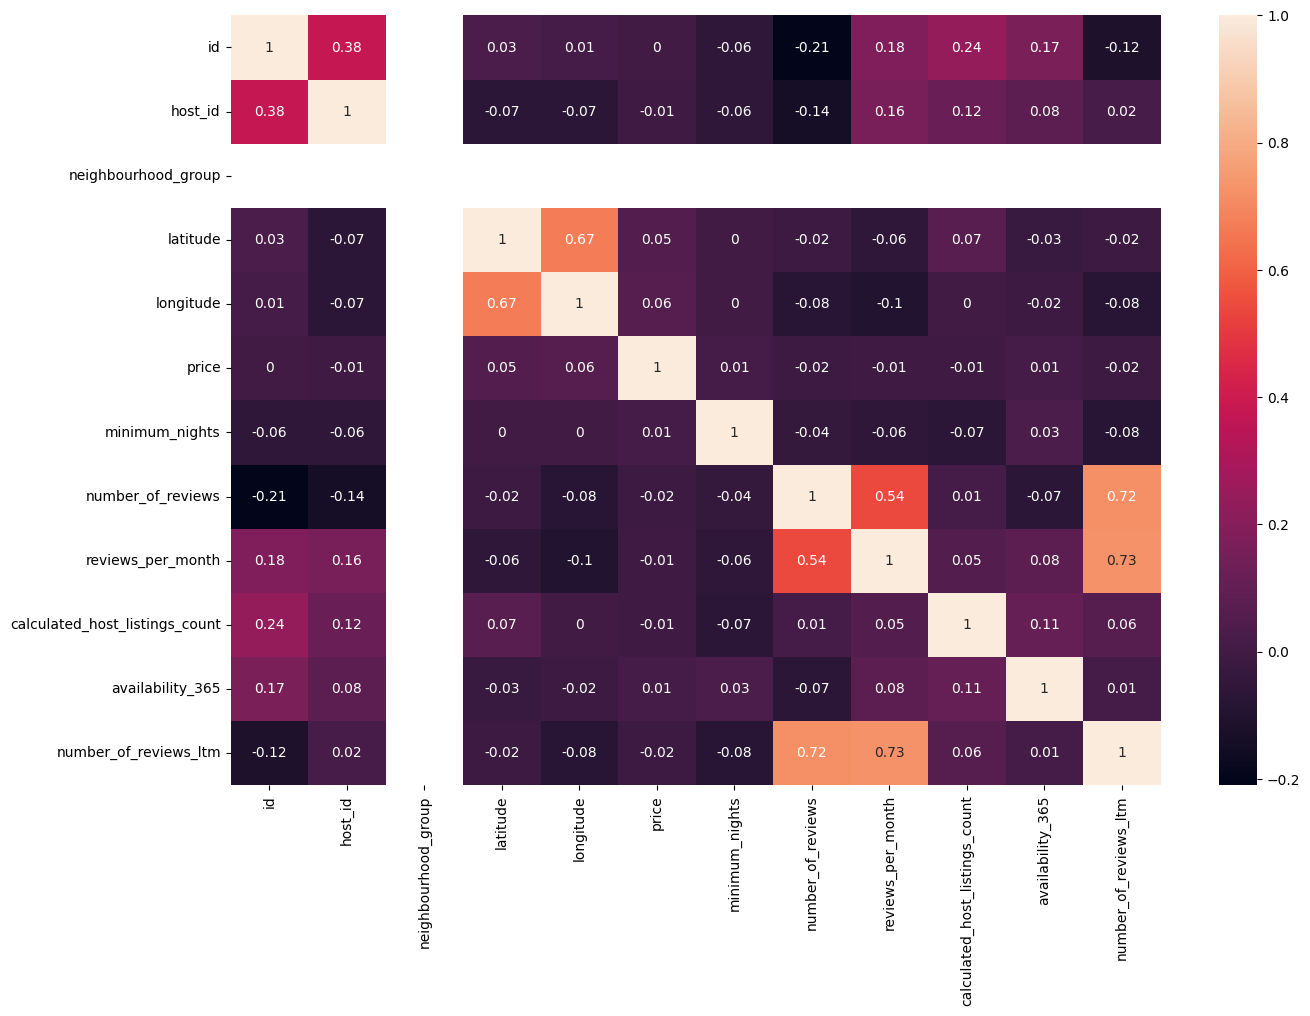

In [38]:
# Create correlation matrix

corr_matrix = df.corr().round(2)

# Plot correlation matrix

plt.figure(figsize=(15,10))

sns.heatmap(data=corr_matrix, annot=True)


In [39]:
# Drop unnecessary columns

df.drop(['id','name','host_id','host_name','last_review','latitude','longitude','reviews_per_month','number_of_reviews', 'calculated_host_listings_count', 'license', 'neighbourhood_group', 'number_of_reviews_ltm'], axis=1, inplace=True)

In [40]:
df.head()

,neighbourhood,room_type,price,minimum_nights,availability_365
0,30,1,30000,1,140
1,5,2,70000,30,52
2,12,1,49590,3,178
3,12,2,50526,1,0
4,26,2,149999,2,356


In [41]:
# Drop null values

df = df.dropna()

df.head()

,neighbourhood,room_type,price,minimum_nights,availability_365
0,30,1,30000,1,140
1,5,2,70000,30,52
2,12,1,49590,3,178
3,12,2,50526,1,0
4,26,2,149999,2,356


In [42]:
# Split data into train and test sets

Y = df['price']
X = df.drop('price', axis=1)

print(X.columns)

Index(['neighbourhood', 'room_type', 'minimum_nights', 'availability_365'], dtype='object')


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


print(f"Size of training set: {X_train.shape}")
print(f"Size of test set: {X_test.shape}")


Size of training set: (6001, 4)
Size of test set: (2573, 4)


In [44]:
# Create a linear regression model

lr = LinearRegression()
lr.fit(X_train, Y_train)

# Predict the price

Y_pred = lr.predict(X_test)

# Calculate the mean squared error

mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean squared error: {mse}")

# Calculate the r2 score

r2 = r2_score(Y_test, Y_pred)
print(f"R2 score: {r2}")


Mean squared error: 836579795256.0348
R2 score: 0.0010324431535773115


In [45]:
# Create a lasso regression model

lasso = Lasso()

# Create a dictionary of all values we want to test for alpha

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Use gridsearch to test all values for alpha

lasso_gs = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_squared_error')

# Fit model to training data

lasso_gs.fit(X_train, Y_train)

# Save best model

lasso_best = lasso_gs.best_estimator_

# Check best n value

print(lasso_gs.best_params_)

# Predict the price

Y_pred = lasso_best.predict(X_test)

# Calculate the mean squared error

mse = mean_squared_error(Y_test, Y_pred)

print(f"Lasso Mean squared error: {mse}")

# Calculate the r2 score

r2 = r2_score(Y_test, Y_pred)

print(f"Lasso R2 score: {r2}")


{'alpha': 100}
Lasso Mean squared error: 836574065710.586
Lasso R2 score: 0.001039284856008127


In [46]:
# Create a ridge regression model

ridge = Ridge()

# Create a dictionary of all values we want to test for alpha

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Use gridsearch to test all values for alpha

ridge_gs = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')

# Fit model to training data

ridge_gs.fit(X_train, Y_train)

# Save best model

ridge_best = ridge_gs.best_estimator_

# Check best n value

print(ridge_gs.best_params_)

# Predict the price

Y_pred = ridge_best.predict(X_test)

# Calculate the mean squared error

mse = mean_squared_error(Y_test, Y_pred)

print(f"Ridge Mean squared error: {mse}")

# Calculate the r2 score

r2 = r2_score(Y_test, Y_pred)

print(f"Ridge R2 score: {r2}")

{'alpha': 1000}
Ridge Mean squared error: 836331284264.2883
Ridge R2 score: 0.0013291923933775873


In [47]:
# K fold cross validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = ridge_best, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Predict the price


Accuracy: 1.83 %
Standard Deviation: 3.46 %


In [48]:
# Save the model

pickle.dump(ridge_best, open('ridge.pkl','wb'))

# Load the model

ridge_model = pickle.load(open('ridge.pkl','rb'))

# Predict the price

print(ridge_model.predict([[1, 2, 1, 1]]))

[45102.32858288]
